In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from partition_decode.plots import continuous_pairplot
from scipy.stats import spearmanr, kendalltau, entropy
from matplotlib.colors import SymLogNorm, LogNorm, Normalize, TwoSlopeNorm

sns.set_style('white')
sns.set_context('notebook')

In [8]:
SAVE_FIGURES=False
DROP_UNCONVERGED=False

In [40]:
algo = "relu"
dataset = "xor"
# Read
df = pd.read_csv(f'./varying_model_results/{dataset}/{dataset}_{algo}_results.csv')

if DROP_UNCONVERGED:
    df.drop(df[df['train_01_error'] == 0.5].index, inplace=True)

# Define headers
metric = "01_error"
train_error = f'train_{metric}'
test_error = f'test_{metric}'
# Set to floats
for col in df.columns:
    try:
        df[col] = df[col].astype(float)
    except:
        pass

for col in ['width', 'depth', 'n_regions']:
    df[col] = df[col].astype(int)
# Create new metrics/columns
df['generalization_gap'] = df[test_error] - df[train_error]
df['IRM_L1'] = df['IRM_L1'] / df['n_train_samples']
df['n_regions'] = df['n_regions'] / df['n_train_samples']

In [41]:
x_var = 'depth'
y_var = 'width'

df.groupby(
    [y_var, x_var],
    as_index=False,
).mean().pivot(y_var, x_var, train_error)

depth,1,2,3,4,6,8,10,12,15,20
width,,,,,,,,,,
2,0.375000,0.305333,0.356333,0.374000,0.452333,0.500000,0.500000,0.500000,0.500000,0.500000
3,0.302667,0.294333,0.327667,0.252667,0.298333,0.418000,0.368333,0.450333,0.500000,0.500000
4,0.262000,0.263333,0.276667,0.349000,0.288000,0.323667,0.345667,0.407667,0.500000,0.406000
6,0.264667,0.252333,0.242333,0.287667,0.240000,0.239667,0.249333,0.321333,0.239667,0.427667
8,0.259333,0.247333,0.243667,0.227333,0.235333,0.321000,0.228000,0.308333,0.326667,0.231667
12,0.259667,0.244333,0.233000,0.221000,0.219333,0.193667,0.209000,0.193333,0.205000,0.225333
16,0.264000,0.237333,0.211000,0.200000,0.197667,0.209667,0.188667,0.216667,0.202000,0.216000
24,0.258667,0.230333,0.204000,0.203000,0.170667,0.192000,0.163333,0.177000,0.210667,0.215000
32,0.255000,0.221000,0.204333,0.187333,0.139000,0.155000,0.116000,0.192000,0.192333,0.209333


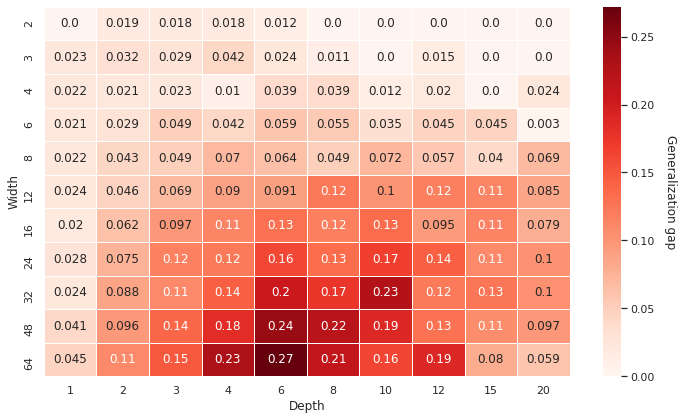

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
g = sns.heatmap(
    data=df.groupby(
        [y_var, x_var],
        as_index=False,
    ).mean().pivot(y_var, x_var, "generalization_gap").round(3),
    linewidths=.5,
    ax=ax,
    cmap='Reds',
    # norm=SymLogNorm(1e-3),
    annot=True, fmt=".2",
)
plt.xlabel('Depth')
plt.ylabel('Width')
cbar = ax.collections[0].colorbar
cbar.set_label('Generalization gap', rotation=270, labelpad=22)
plt.tight_layout()
# plt.title('Generalization Gap across architectures')
plt.show()

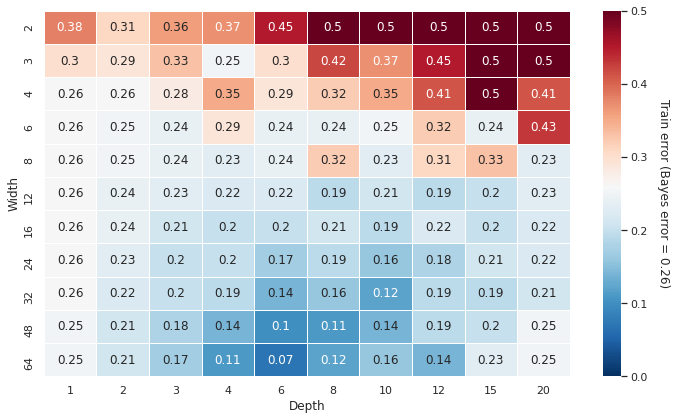

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
g = sns.heatmap(
    data=df.groupby(
        [y_var, x_var],
        as_index=False,
    ).mean().pivot(y_var, x_var, train_error).round(2),
    linewidths=.5,
    ax=ax,
    cmap='RdBu_r',
    norm=TwoSlopeNorm(vmin=0, vcenter=0.26, vmax=0.5),
    # norm=SymLogNorm(1e-3),
    annot=True, fmt=".2",
)
plt.xlabel('Depth')
plt.ylabel('Width')
cbar = ax.collections[0].colorbar
cbar.set_label('Train error (B)', rotation=270, labelpad=22)
plt.tight_layout()
# plt.title('Train error across architectures')
plt.show()

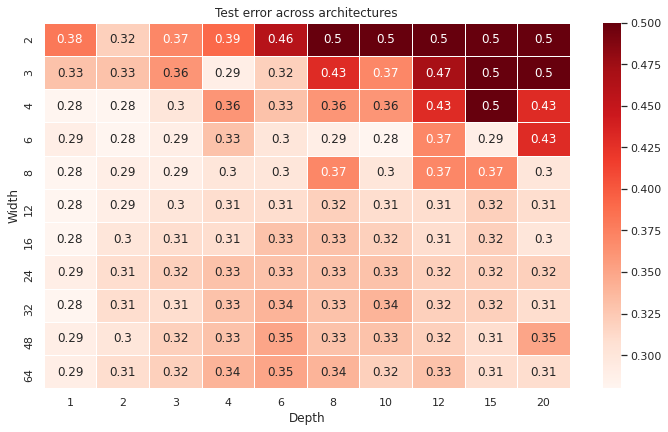

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
g = sns.heatmap(
    data=df.groupby(
        [y_var, x_var],
        as_index=False,
    ).mean().pivot(y_var, x_var, test_error).round(2),
    linewidths=.5,
    ax=ax,
    # cmap='RdBu_r',
    # norm=TwoSlopeNorm(vmin=0, vcenter=0.26, vmax=0.5),
    cmap='Reds',
    # norm=SymLogNorm(1e-3),
    annot=True, fmt=".2",
)
plt.xlabel('Depth')
plt.ylabel('Width')
plt.tight_layout()
plt.title('Test error across architectures')
plt.show()